In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp
import math
import scipy.constants as const

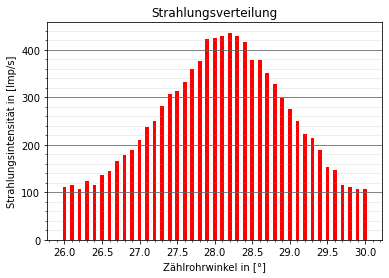

In [185]:
ThetaGMr=np.genfromtxt('bragg.dat', usecols=(1))
NBraggr=np.genfromtxt('bragg.dat', usecols=(2))
NBragg=NBraggr*2
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')

plt.bar(ThetaGM,NBragg, width=0.05, color='r')
plt.title('Strahlungsverteilung')
plt.ylabel('Strahlungsintensität in [Imp/s]')
plt.xlabel('Zählrohrwinkel in [°]')
plt.savefig('Braggwinkel.pdf')

K Alpha Peak: 1599.0 1.3908611455660976e-10
K Beta Peak: 5050.0 1.5414488655665816e-10
799.5
2525.0
291.0 1.3776571373157935e-10 425.0 1.417218159774139e-10
536.0 1.5284494105828324e-10 901.0 1.5673912711647506e-10


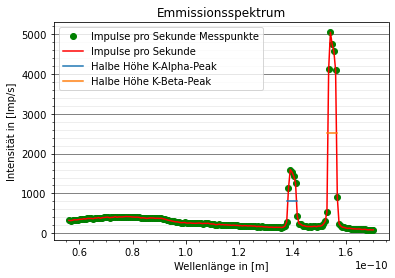

In [184]:

ThetaEm=np.genfromtxt('Emissionsspektrum.dat', usecols=(0))
ThetaEmRAD=ThetaEm*math.pi/180
Nem=np.genfromtxt('Emissionsspektrum.dat', usecols=(1))
d=201.4e-12
Lamda=2*d*np.sin(ThetaEmRAD)
NemOU=Nem
Kalpha=122
Kbeta=145
print('K Alpha Peak:',NemOU[Kalpha],Lamda[Kalpha])
print('K Beta Peak:',NemOU[Kbeta],Lamda[Kbeta])
print(NemOU[Kalpha]/2)
print(NemOU[Kbeta]/2)
x = np.linspace(1.3776571373157935e-10, 1.417218159774139e-10)
y = np.linspace(1.5284494105828324e-10, 1.5673912711647506e-10)
E=const.h*const.c/Lamda/const.e
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.plot(Lamda,Nem, 'go',label='Impulse pro Sekunde Messpunkte')
plt.plot(Lamda,Nem, color='r',label='Impulse pro Sekunde')
plt.plot(x,NemOU[Kalpha]/2*x/x, label='Halbe Höhe K-Alpha-Peak')
plt.plot(y,NemOU[Kbeta]/2*y/y,label='Halbe Höhe K-Beta-Peak')
plt.legend(loc='best')
plt.title('Emmissionsspektrum')
plt.ylabel('Intensität in [Imp/s]')
plt.xlabel('Wellenlänge in [m]')
plt.savefig('Emmisionssprktrum.pdf')
print(NemOU[Kalpha-2],Lamda[Kalpha-2],NemOU[Kalpha+4],Lamda[Kalpha+4])
print(NemOU[Kbeta-2],Lamda[Kbeta-2],NemOU[Kbeta+4],Lamda[Kbeta+4])

K Alpha Peak: 1599.0 8.914203896517447  KeV
K Beta Peak: 5050.0 8.04335461284524  KeV
K Alpha halbe: 799.5 8.914203896517447  KeV
K Beta halbe: 2525.0 8.04335461284524  KeV
E-Alpha +: 8.999641135295043 KeV
E-Alpha -: 8.748420105833214 KeV
E-Beta +: 8.111763305657744 KeV
E-Beta -: 7.910226419792798 KeV
Delta E-Alpha: 0.25122102946182895 Kev
Delta E-Beta: 0.20153688586494628 Kev


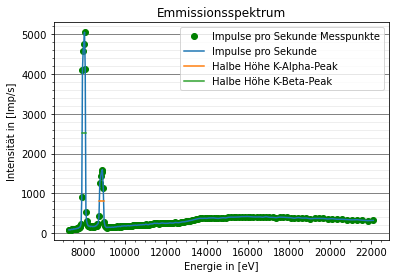

In [183]:
a=const.h*const.c/x/const.e
b=const.h*const.c/y/const.e
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.plot(E,Nem,'go',label='Impulse pro Sekunde Messpunkte')
plt.plot(E,Nem,label='Impulse pro Sekunde')
plt.plot(a,NemOU[Kalpha]/2*a/a, label='Halbe Höhe K-Alpha-Peak')
plt.plot(b,NemOU[Kbeta]/2*b/b,label='Halbe Höhe K-Beta-Peak')
plt.legend(loc='best')
plt.title('Emmissionsspektrum')
plt.ylabel('Intensität in [Imp/s]')
plt.xlabel('Energie in [eV]')
plt.savefig('EmmisionssprktrumII.pdf')
print('K Alpha Peak:',NemOU[Kalpha],const.h*const.c/Lamda[Kalpha]/const.e/1000,' KeV')
print('K Beta Peak:',NemOU[Kbeta],const.h*const.c/Lamda[Kbeta]/const.e/1000,' KeV')
print('K Alpha halbe:',NemOU[Kalpha]/2,const.h*const.c/Lamda[Kalpha]/const.e/1000,' KeV')
print('K Beta halbe:',NemOU[Kbeta]/2,const.h*const.c/Lamda[Kbeta]/const.e/1000,' KeV')
print('E-Alpha +:',const.h*const.c/const.e/1000/Lamda[Kalpha-2],'KeV')
print('E-Alpha -:',const.h*const.c/const.e/1000/Lamda[Kalpha+4],'KeV')
print('E-Beta +:',const.h*const.c/const.e/1000/Lamda[Kbeta-2],'KeV')
print('E-Beta -:',const.h*const.c/const.e/1000/Lamda[Kbeta+4],'KeV')
print('Delta E-Alpha:',(const.h*const.c/const.e/(Lamda[Kalpha-2])-(const.h*const.c/const.e/Lamda[Kalpha+4]))/1000,'Kev')
print('Delta E-Beta:',(const.h*const.c/const.e/(Lamda[Kbeta-2])-(const.h*const.c/const.e/Lamda[Kbeta+4]))/1000,'Kev')


In [108]:
#Berechnung des Auflösungsvermögens
DEAlpha=(const.h*const.c/const.e/(Lamda[Kalpha-2])-(const.h*const.c/const.e/Lamda[Kalpha+4]))/1000
DEBeta=(const.h*const.c/const.e/(Lamda[Kbeta-2])-(const.h*const.c/const.e/Lamda[Kbeta+4]))/1000
EKAlpha=(const.h*const.c/Lamda[Kalpha]/const.e/1000)
EKBeta=(const.h*const.c/Lamda[Kbeta]/const.e/1000)
print('Alpha A=',EKAlpha/DEAlpha)
print('Beta A=',EKBeta/DEBeta)

Alpha A= 35.48350994187726
Beta A= 39.91008682269332


In [111]:
#Berechnung der Absorbtionskonstanten
Z=29
n=1
m=2
l=3
R=0.0136
EKABS=8.98796
Sigma1=Z-np.sqrt(EKABS/R)
Sigma2=Z-m*np.sqrt((R+n*EKAlpha)/n*R)*(Z-Sigma1)
Sigma3=Z-l*np.sqrt((R+n*EKAlpha)/n*R)*(Z-Sigma1)
print('Sigma1=',Sigma1)
print('Sigma2=',Sigma2)
print('Sigma3=',Sigma3)

Sigma1= 3.292425011979333
Sigma2= 11.084337097417471
Sigma3= 2.1265056461262084


IKBrom 20.0
[12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1
 14.2 14.3] [10. 12.  9. 13. 18. 21. 25. 27. 27. 22. 25. 21. 23. 20. 21. 19.]


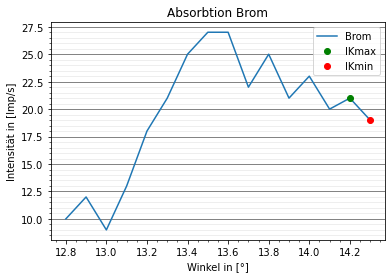

In [182]:
ThetaBrom=np.genfromtxt('Brom.dat', usecols=(0))
ThetaGallium=np.genfromtxt('Gallium.dat', usecols=(0))
ThetaRubidium=np.genfromtxt('Rubidium.dat', usecols=(0))
ThetaStrontium=np.genfromtxt('Strontium.dat', usecols=(0))
ThetaZink=np.genfromtxt('Zink.dat', usecols=(0))
ThetaZirkonium=np.genfromtxt('Zirkonium.dat', usecols=(0))
NBrom=np.genfromtxt('Brom.dat', usecols=(1))
NGallium=np.genfromtxt('Gallium.dat', usecols=(1))
NRubidium=np.genfromtxt('Rubidium.dat', usecols=(1))
NStrontium=np.genfromtxt('Strontium.dat', usecols=(1))
NZink=np.genfromtxt('Zink.dat', usecols=(1))
NZirkonium=np.genfromtxt('Zirkonium.dat', usecols=(1))
g = np.linspace(13, 15)
IKmiBrom=19
IKmaBrom=21
TmaBrom=14.2
TmiBrom=14.3
IKBrom=IKmiBrom+(IKmaBrom-IKmiBrom)/2
print('IKBrom',IKBrom)
mBrom=(IKmiBrom-IKmaBrom)/(TmiBrom-TmaBrom)
bBrom=IKmiBrom-mBrom*TmiBrom
TBrom=(IKBrom-bBrom)/mBrom
#print(mBrom,bBrom,TBrom)
plt.plot(ThetaBrom,NBrom, label='Brom')
plt.plot(14.2,21,'go',label='IKmax')
plt.plot(14.3,19,'ro',label='IKmin')
#plt.plot(g,mBrom*g+bBrom)
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.legend(loc='best')
plt.title('Absorbtion Brom')
plt.xlabel('Winkel in [°]')
plt.ylabel('Intensität in [Imp/s]')
plt.savefig('AbsorbtionsspektrumBrom.pdf')
print(ThetaBrom,NBrom)

289.5
[ 9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8
 10.9 11. ] [112. 120. 126. 147. 180. 225. 266. 282. 290. 301. 295. 283. 296. 283.
 286. 286.]


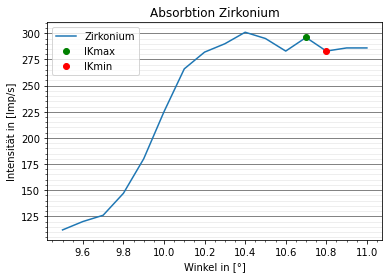

In [163]:
IKmiZirkonium=283
IKmaZirkonium=296
TmaZirkonium=10.7
TmiZirkonium=10.8
mZirkonium=(IKmiZirkonium-IKmaZirkonium)/(TmiZirkonium-TmaZirkonium)
bZirkonium=IKmiZirkonium-mZirkonium*TmiZirkonium
IKZirkonium=IKmiZirkonium+(IKmaZirkonium-IKmiZirkonium)/2
TZirkonium=(IKZirkonium-bZirkonium)/mZirkonium

print(IKZirkonium)
print(ThetaZirkonium,NZirkonium)
plt.plot(ThetaZirkonium,NZirkonium, label='Zirkonium')
plt.plot(10.7,IKmaZirkonium,'go',label='IKmax')
plt.plot(10.8,IKmiZirkonium,'ro',label='IKmin')
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.legend(loc='best')
plt.title('Absorbtion Zirkonium')
plt.xlabel('Winkel in [°]')
plt.ylabel('Intensität in [Imp/s]')
plt.savefig('AbsorbtionsspektrumZirkonium.pdf')

97.5
[18.  18.1 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3
 19.4 19.5] [ 58.  54.  55.  54.  54.  55.  65.  84.  91. 100. 102. 100.  98. 100.
  95.  98.]


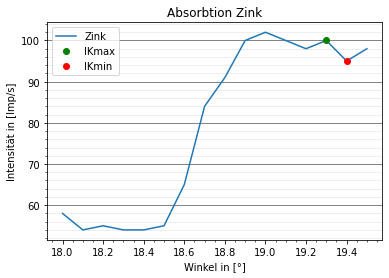

In [166]:

IKmiZink=95
IKmaZink=100
TmaZink=19.3
TmiZink=19.4
mZink=(IKmiZink-IKmaZink)/(TmiZink-TmaZink)
bZink=IKmiZink-mZink*TmiZink
IKZink=IKmiZink+(IKmaZink-IKmiZink)/2
TZink=(IKZink-bZink)/mZink
print(IKZink)
print(ThetaZink,NZink)
plt.plot(ThetaZink,NZink, label='Zink')
plt.plot(19.3,IKmaZink,'go',label='IKmax')
plt.plot(19.4,IKmiZink,'ro',label='IKmin')
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.legend(loc='best')
plt.title('Absorbtion Zink')
plt.xlabel('Winkel in [°]')
plt.ylabel('Intensität in [Imp/s]')
plt.savefig('AbsorbtionsspektrumZink.pdf')

188.5
[10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8
 11.9 12. ] [ 43.  41.  40.  44.  50.  89. 120. 152. 181. 193. 181. 196. 181. 173.
 166. 159.]


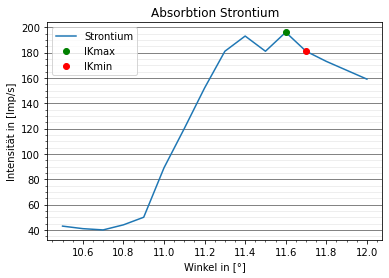

In [181]:
IKmiStrontium=181
IKmaStrontium=196
TmaStrontium=11.6
TmiStrontium=11.7
mStrontium=(IKmiStrontium-IKmaStrontium)/(TmiStrontium-TmaStrontium)
bStrontium=IKmiStrontium-mStrontium*TmiStrontium
IKStrontium=IKmiStrontium+(IKmaStrontium-IKmiStrontium)/2
TStrontium=(IKStrontium-bStrontium)/mStrontium

print(IKStrontium)
print(ThetaStrontium,NStrontium)
plt.plot(ThetaStrontium,NStrontium, label='Strontium')
plt.plot(11.6,IKmaStrontium,'go',label='IKmax')
plt.plot(11.7,IKmiStrontium,'ro',label='IKmin')
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.legend(loc='best')
plt.title('Absorbtion Strontium')
plt.xlabel('Winkel in [°]')
plt.ylabel('Intensität in [Imp/s]')
plt.savefig('AbsorbtionsspektrumStrontium.pdf')

59.0
[11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5] [11. 10. 10. 12. 17. 32. 39. 47. 57. 64. 61. 57. 54. 54.]


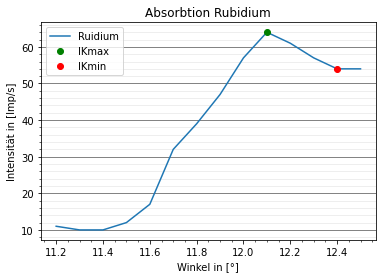

In [168]:
IKmiRubidium=54
IKmaRubidium=64
TmaRubidium=12.1
TmiRubidium=12.4
mRubidium=(IKmiRubidium-IKmaRubidium)/(TmiRubidium-TmaRubidium)
bRubidium=IKmiRubidium-mRubidium*TmiRubidium
IKRubidium=IKmiRubidium+(IKmaRubidium-IKmiRubidium)/2
TRubidium=(IKRubidium-bRubidium)/mRubidium

print(IKRubidium)
print(ThetaRubidium,NRubidium)
plt.plot(ThetaRubidium,NRubidium, label='Ruidium')
plt.plot(12.1,IKmaRubidium,'go',label='IKmax')
plt.plot(12.4,IKmiRubidium,'ro',label='IKmin')
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.legend(loc='best')
plt.title('Absorbtion Rubidium')
plt.xlabel('Winkel in [°]')
plt.ylabel('Intensität in [Imp/s]')
plt.savefig('AbsorbtionsspektrumRubidium.pdf')

104.0
[17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3
 18.4 18.5 18.6 18.7 18.8 18.9 19. ] [ 66.  66.  78.  88. 102. 116. 121. 121. 122. 122. 119. 114. 110. 108.
 104. 110. 110. 109.  99. 100.  98.]


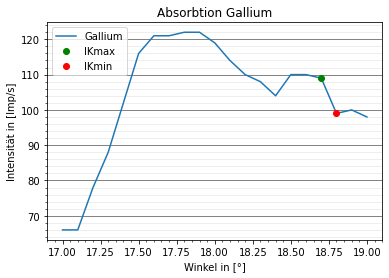

In [169]:
IKmiGallium=99
IKmaGallium=109
TmaGallium=18.7
TmiGallium=18.8
mGallium=(IKmiGallium-IKmaGallium)/(TmiGallium-TmaGallium)
bGallium=IKmiGallium-mGallium*TmiGallium
IKGallium=IKmiGallium+(IKmaGallium-IKmiGallium)/2
TGallium=(IKGallium-bGallium)/mGallium

print(IKGallium)
print(ThetaGallium,NGallium)
plt.plot(ThetaGallium,NGallium, label='Gallium')
plt.plot(18.7,IKmaGallium,'go',label='IKmax')
plt.plot(18.8,IKmiGallium,'ro',label='IKmin')
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.legend(loc='best')
plt.title('Absorbtion Gallium')
plt.xlabel('Winkel in [°]')
plt.ylabel('Intensität in [Imp/s]')
plt.savefig('AbsorbtionsspektrumGallium.pdf')

In [180]:
print('Theta Brom:',TBrom)
print('Theta Zirkonium',TZirkonium)
print('Theta Zink',TZink)
print('Theta Strontium',TStrontium)
print('Theta Rubidium',TRubidium)
print('Theta Gallium',TGallium)
EBrom=const.h*const.c/(2*d*np.sin(TBrom*math.pi/180)*const.e*1000)
EZirkonium=const.h*const.c/(2*d*np.sin(TZirkonium*math.pi/180)*const.e*1000)
EZink=const.h*const.c/(2*d*np.sin(TZink*math.pi/180)*const.e*1000)
EStrontium=const.h*const.c/(2*d*np.sin(TStrontium*math.pi/180)*const.e*1000)
ERubidium=const.h*const.c/(2*d*np.sin(TRubidium*math.pi/180)*const.e*1000)
EGallium=const.h*const.c/(2*d*np.sin(TGallium*math.pi/180)*const.e*1000)
print('EBrom',EBrom)
print('EZirkonium',EZirkonium)
print('EZink',EZink)
print('EStrontium',EStrontium)
print('ERubidium',ERubidium)
print('EGallium',EGallium)

ZBrom=35
ZZirkonium=40
ZZink=30
ZStrontium=38
ZRubidium=37
ZGallium=31
al=7.297352e-3
SigmaBrom=ZBrom-np.sqrt((EBrom/R)-(al**2*Z**4/4))
SigmaZirkonium=ZZirkonium-np.sqrt((EZirkonium/R)-(al**2*ZZirkonium**4/4))
SigmaZink=ZZink-np.sqrt((EZink/R)-(al**2*ZZink**4/4))
SigmaStrontium=ZStrontium-np.sqrt((EStrontium/R)-(al**2*ZStrontium**4/4))
SigmaRubidium=ZRubidium-np.sqrt((ERubidium/R)-(al**2*ZRubidium**4/4))
SigmaGallium=ZGallium-np.sqrt((EGallium/R)-(al**2*ZGallium**4/4))
print('S Brom',SigmaBrom)
print('S Zirkonium',SigmaZirkonium)
print('S Zimk',SigmaZink)
print('S Strontium',SigmaStrontium)
print('S Rubidium',SigmaRubidium)
print('S Gallium',SigmaGallium)
RBrom=EBrom/(const.h*(ZBrom-SigmaBrom)**2)
RZirkonium=EZirkonium/(const.h*(ZZirkonium-SigmaZirkonium)**2)
RZink=EZink/(const.h*(ZZink-SigmaZink)**2)
RStrontium=EStrontium/(const.h*(ZStrontium-SigmaStrontium)**2)
RRubidium=ERubidium/(const.h*(ZRubidium-SigmaRubidium)**2)
RGallium=EGallium/(const.h*(ZGallium-SigmaGallium)**2)
print('R Brom',RBrom)
print('R Zirkonium',RZirkonium)
print('R Zink',RZink)
print('R Strontium',RStrontium)
print('R Rubidium',RRubidium)
print('R Gallium',RGallium)

Theta Brom: 14.25
Theta Zirkonium 10.75
Theta Zink 19.349999999999998
Theta Strontium 11.649999999999999
Theta Rubidium 12.25
Theta Gallium 18.75
EBrom 12.504640962128615
EZirkonium 16.50220859915906
EZink 9.289787428946275
EStrontium 15.242993222302287
ERubidium 14.506986148399395
EGallium 9.575857613097268
S Brom 4.833081398257836
S Zirkonium 5.658817295570351
S Zimk 4.071459596389378
S Strontium 4.938704647117049
S Rubidium 4.724006461402588
S Gallium 4.697671332990652
R Brom 2.073735174908265e+31
R Zirkonium 2.111813427608949e+31
R Zink 2.0854203523010155e+31
R Strontium 2.1046238923643882e+31
R Rubidium 2.101657428762443e+31
R Gallium 2.0889750345859695e+31
